In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from google.colab import drive

In [ ]:
drive.mount('/content/drive')
%cd /content/drive/MyDrive/kaggle

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/kaggle


In [ ]:
#Read File :
train_data = pd.read_csv('application_train.csv')
col = train_data.columns.tolist()

# Separate Numerical and Categorical DataTypes

In [ ]:
#Categorical
categorical = set(train_data.select_dtypes(include='object').columns)

for c in col:
  for j in ['FLAG_','REG_','REGION_RATING']:
    if j in c:
      categorical.add(c)
  
categorical.add('LIVE_REGION_NOT_WORK_REGION')
categorical.add('LIVE_CITY_NOT_WORK_CITY')
print(len(categorical)) #50

train_data["TARGET"] = train_data["TARGET"].astype("category")
for feature in categorical:
    train_data[feature] = train_data[feature].astype("category")

#Numerical
numerical = train_data.select_dtypes(include = ['float64', 'int64']).columns
print(len(numerical))   #71

50
71


# *Filter Numerical DataType*

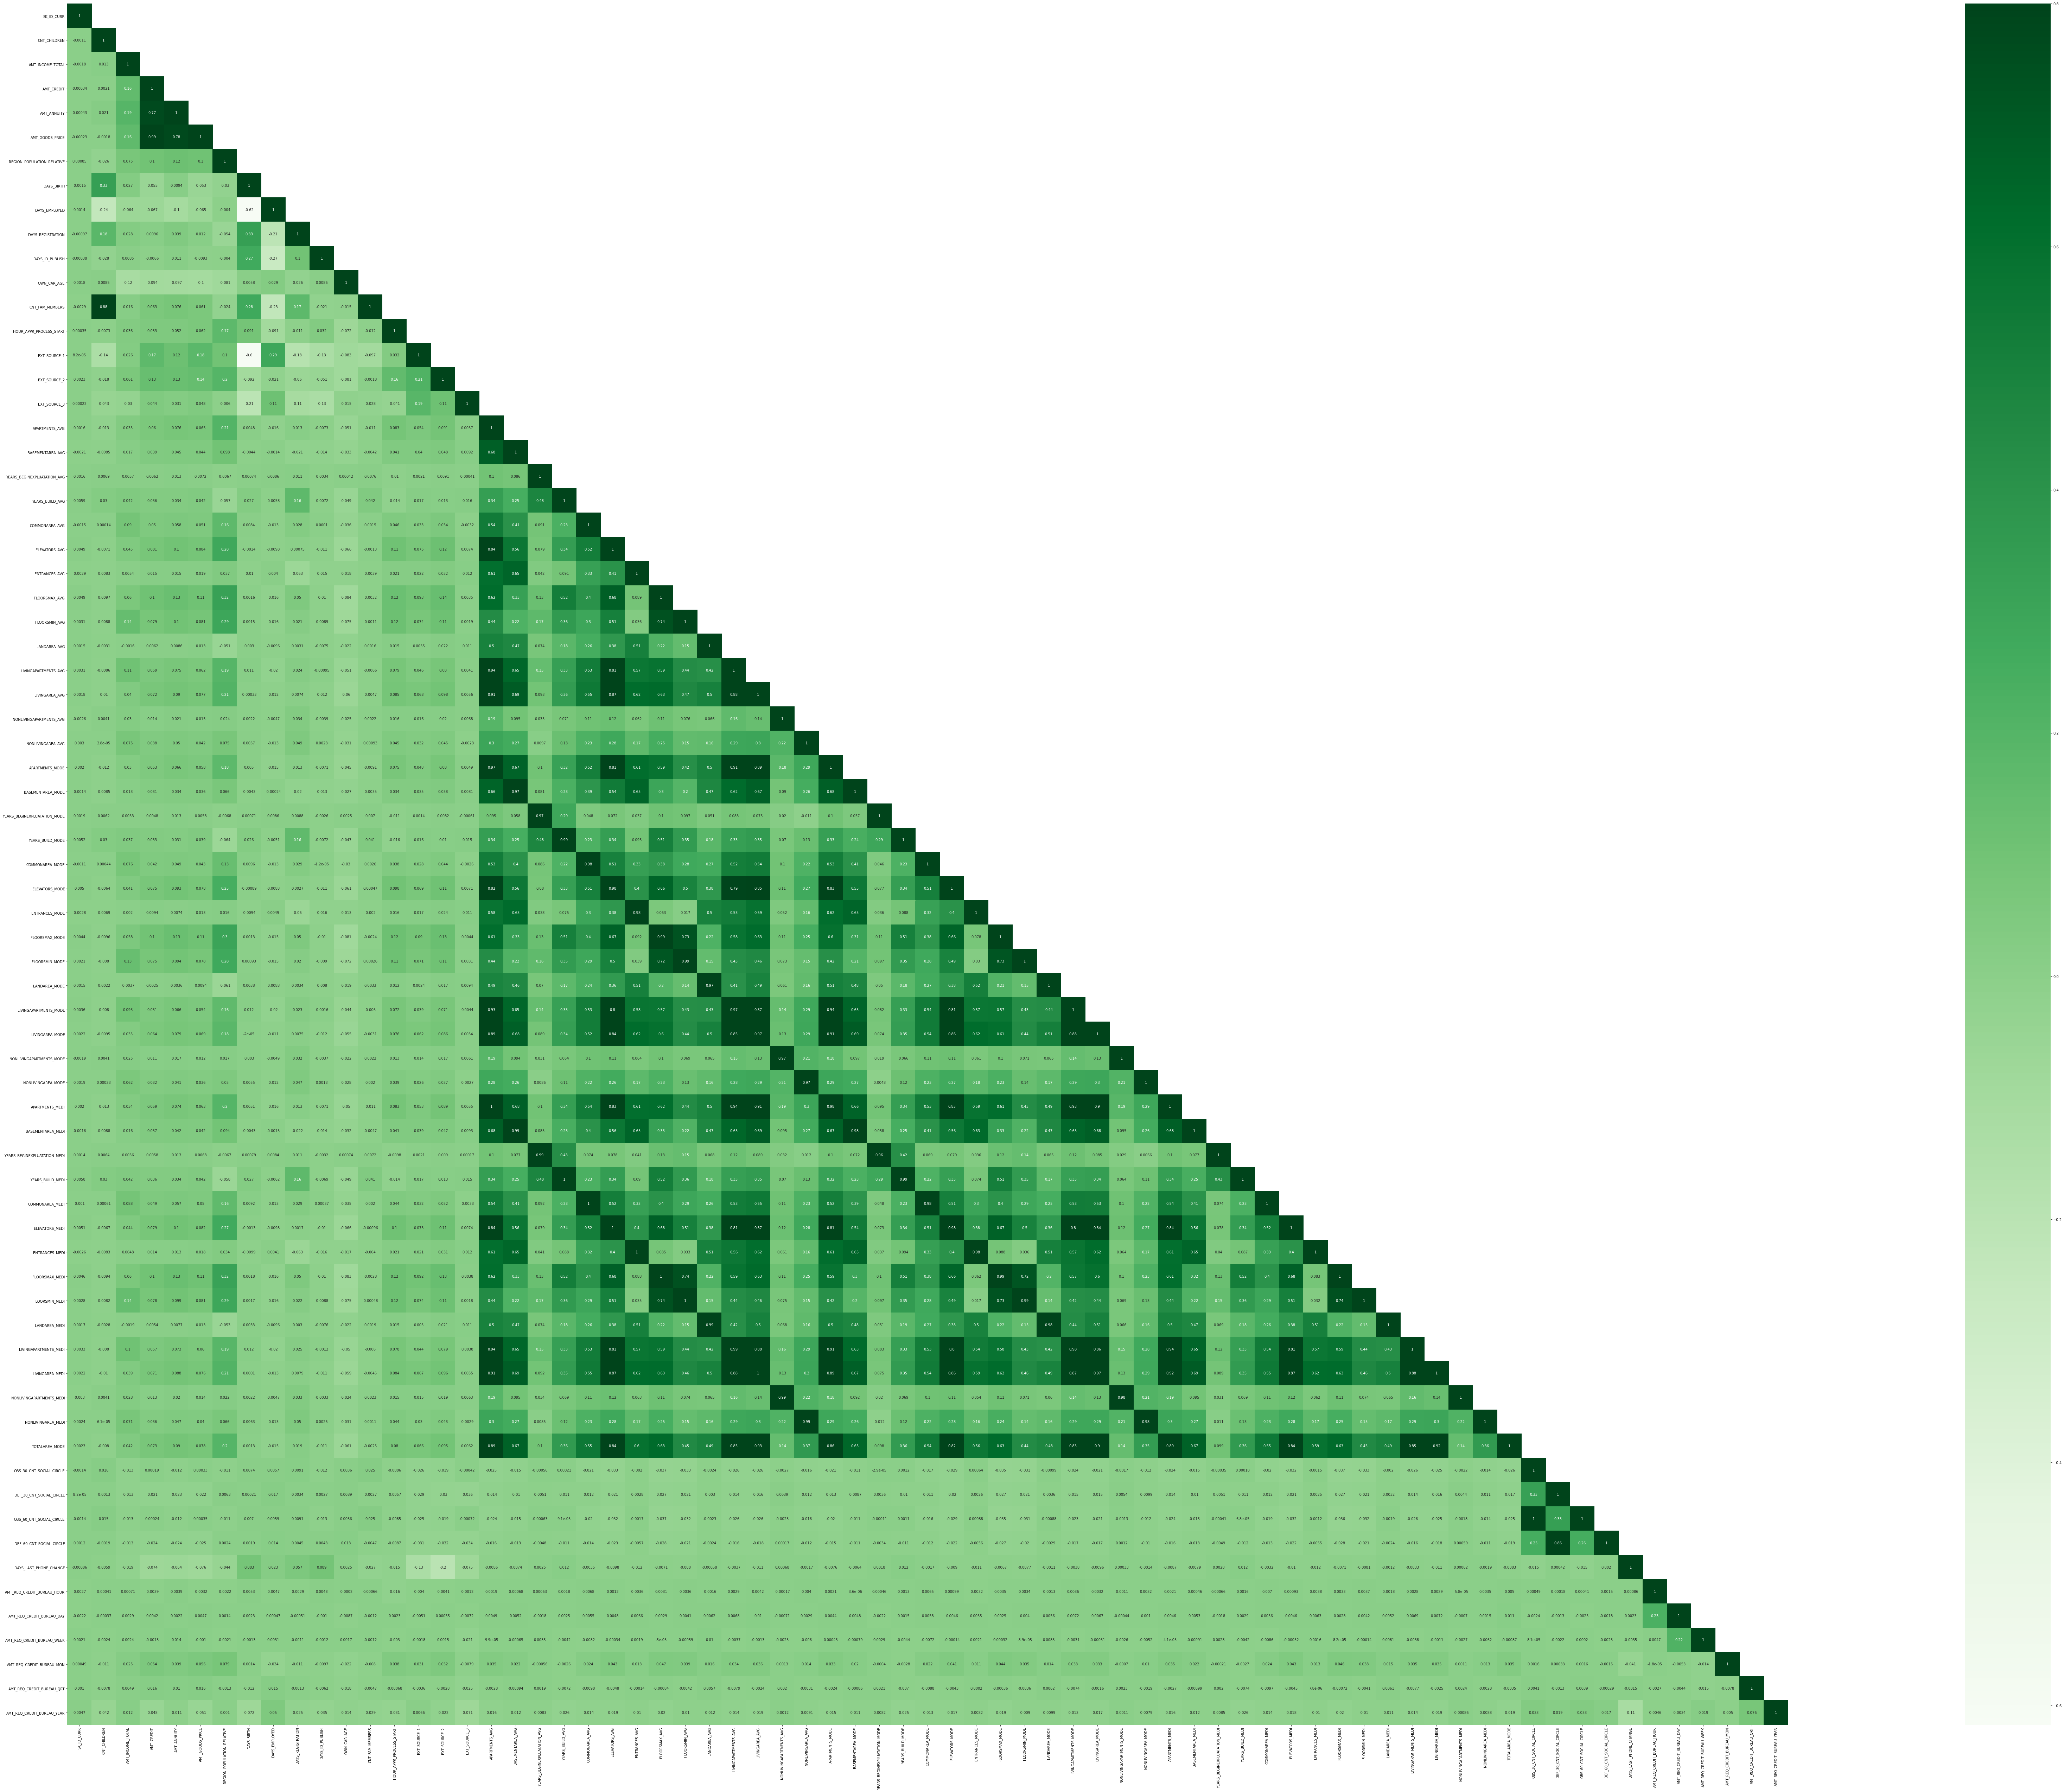

In [ ]:
#Correlation matrix of numerical datatypes before filtering
correlation_matrix = train_data.corr()
mask = np.array(correlation_matrix)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(180,90)
sns.heatmap(correlation_matrix, cmap="Greens", mask=mask,vmax=.8, square=True,annot=True)

In [ ]:
#Delete columns based on correlation matrix
delete_cols =  { "CNT_CHILDREN", 
                 "LIVINGAPARTMENTS_AVG",
                 "APARTMENTS_MODE",
                 "BASEMENTAREA_MODE",
                 "YEARS_BEGINEXPLUATATION_MODE",
                 "YEARS_BUILD_MODE",
                 "COMMONAREA_MODE",
                 "ELEVATORS_MODE",
                 "ENTRANCES_MODE",
                 "FLOORSMAX_MODE",
                 "FLOORSMIN_MODE",
                 "LANDAREA_MODE",
                 "LIVINGAPARTMENTS_MODE",
                 "LIVINGAREA_MODE",
                 "NONLIVINGAPARTMENTS_MODE",
                 "NONLIVINGAREA_MODE",
                 "APARTMENTS_MEDI",
                 "BASEMENTAREA_MEDI",
                 "YEARS_BEGINEXPLUATATION_MEDI",
                 "YEARS_BUILD_MEDI",
                 "COMMONAREA_MEDI",
                 "ELEVATORS_MEDI",
                 "ENTRANCES_MEDI",
                 "LANDAREA_AVG",
                 "FLOORSMAX_MEDI",
                 "FLOORSMIN_MEDI",
                 "LANDAREA_MEDI",
                 "LIVINGAPARTMENTS_MEDI",
                 "LIVINGAREA_MEDI",
                 "NONLIVINGAPARTMENTS_MEDI",
                 "NONLIVINGAREA_MEDI",
                 "TOTALAREA_MODE",
                 "AMT_GOODS_PRICE",
                 "NONLIVINGAREA_AVG",
                 "SK_ID_CURR",
                 "AMT_ANNUITY",
                 "ELEVATORS_AVG",
                 "APARTMENTS_AVG",
                 "BASEMENTAREA_AVG",
                 "OBS_30_CNT_SOCIAL_CIRCLE",
                 "DEF_30_CNT_SOCIAL_CIRCLE",
                 "LIVINGAREA_AVG", 
                 "DAYS_EMPLOYED", 
                 "EXT_SOURCE_1", 
                 "CNT_FAM_MEMBERS",
                 "FLOORSMIN_AVG"
                }
for d in delete_cols:
    train_data.drop(d, inplace=True, axis=1)
    
numerical = train_data.select_dtypes(include = ['float64', 'int64']).columns

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb1a2342410>,
      dtype=object)

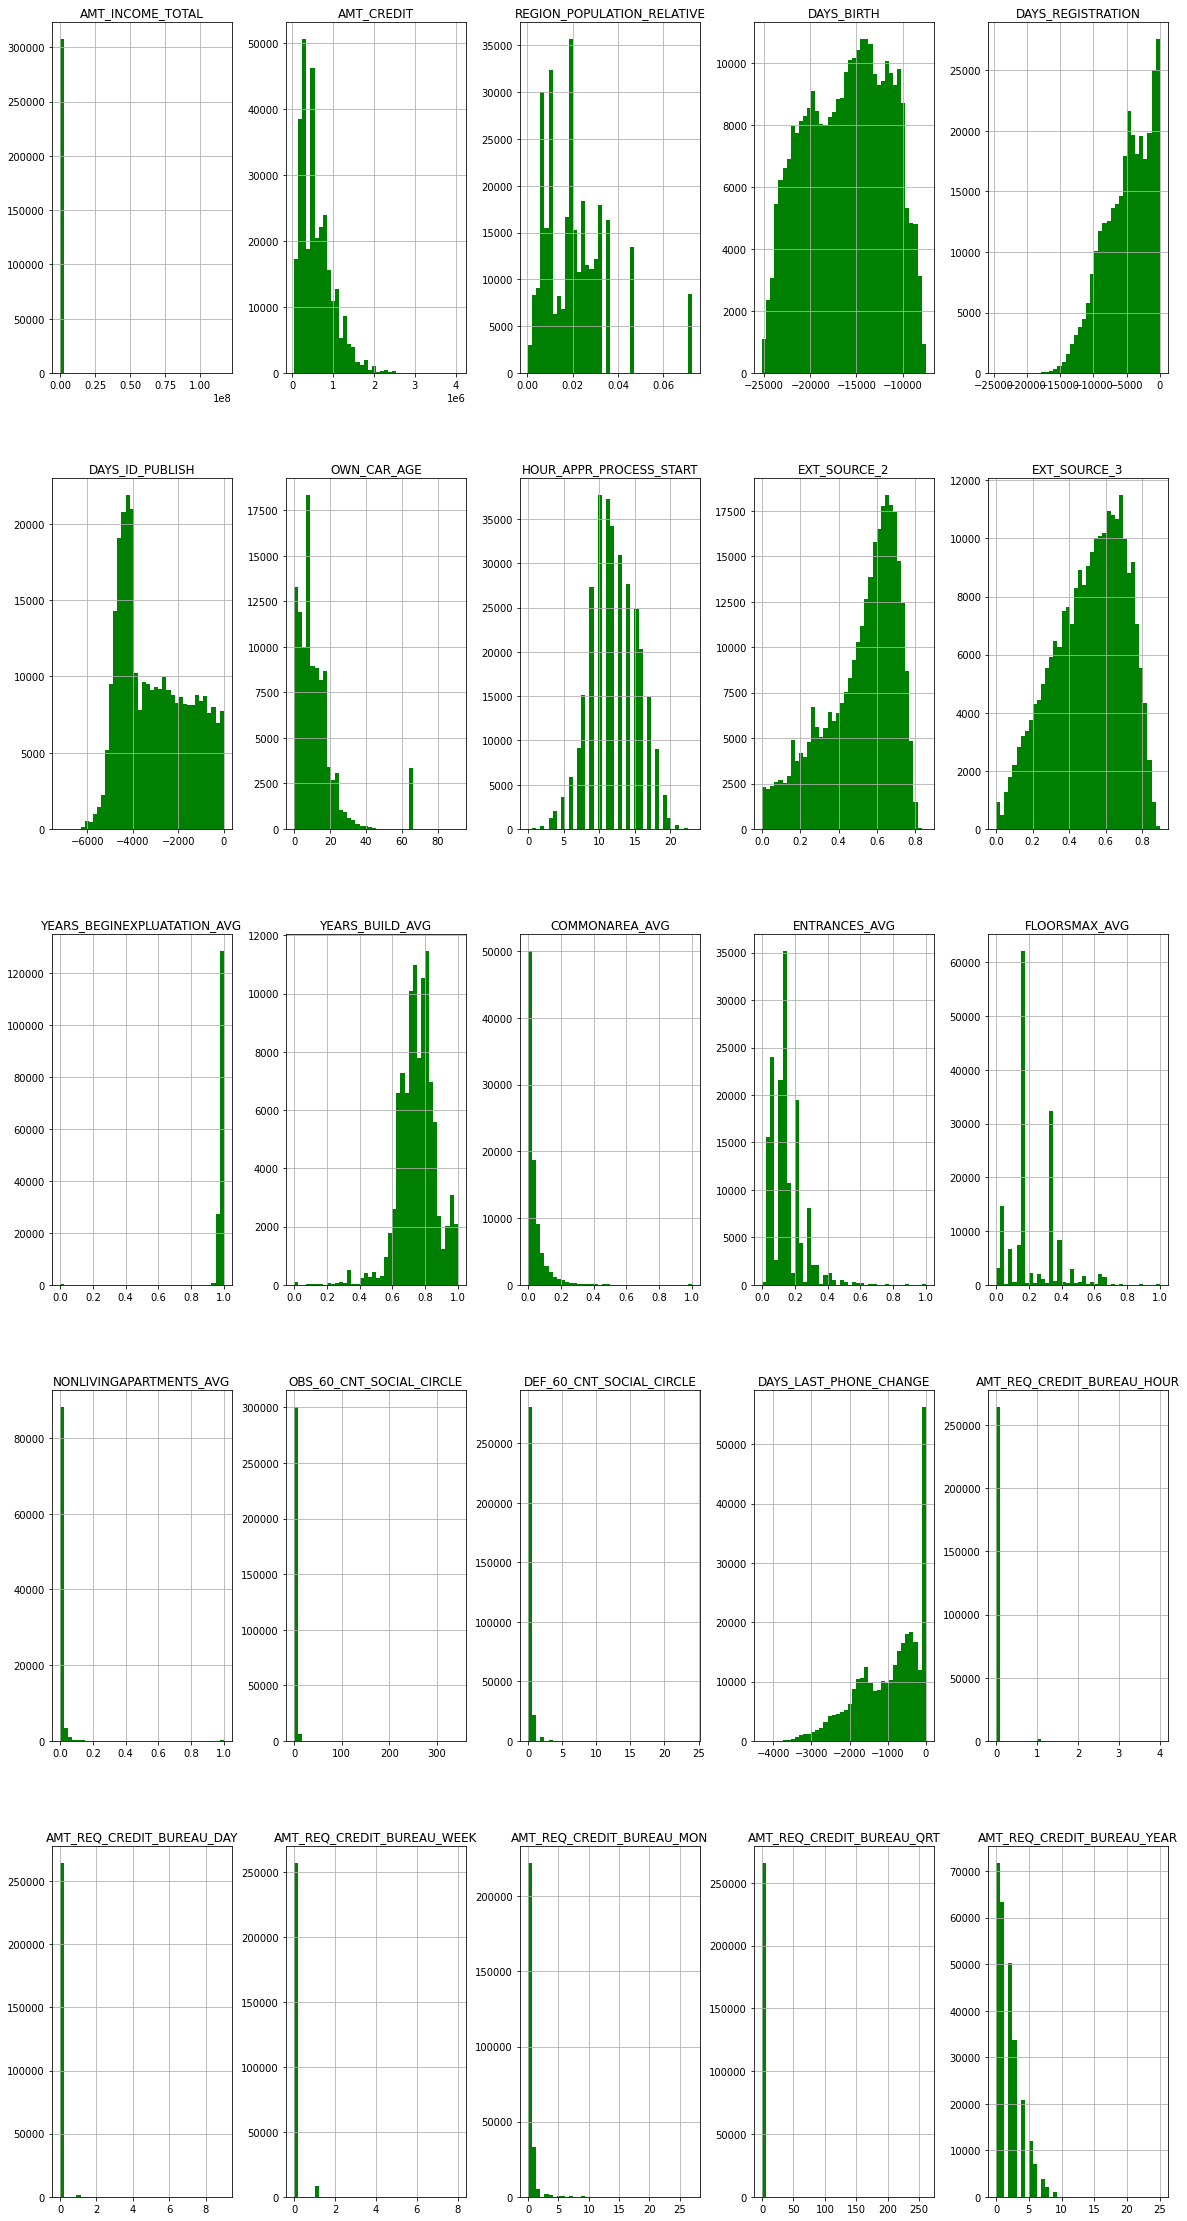

In [ ]:
#histogram of numerical data
train_data[numerical].hist(figsize=(20, 40), color = 'g', bins=40, xlabelsize=10, ylabelsize=10)

In [ ]:
#Percentage missing data in each Numerical dtype column
percent_missing = train_data[numerical].isnull().sum() * 100 / len(train_data[numerical])
percent_missing

AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
OWN_CAR_AGE                    65.990810
HOUR_APPR_PROCESS_START         0.000000
EXT_SOURCE_2                    0.214626
EXT_SOURCE_3                   19.825307
YEARS_BEGINEXPLUATATION_AVG    48.781019
YEARS_BUILD_AVG                66.497784
COMMONAREA_AVG                 69.872297
ENTRANCES_AVG                  50.348768
FLOORSMAX_AVG                  49.760822
NONLIVINGAPARTMENTS_AVG        69.432963
OBS_60_CNT_SOCIAL_CIRCLE        0.332021
DEF_60_CNT_SOCIAL_CIRCLE        0.332021
DAYS_LAST_PHONE_CHANGE          0.000325
AMT_REQ_CREDIT_BUREAU_HOUR     13.501631
AMT_REQ_CREDIT_BUREAU_DAY      13.501631
AMT_REQ_CREDIT_BUREAU_WEEK     13.501631
AMT_REQ_CREDIT_BUREAU_MON      13.501631
AMT_REQ_CREDIT_BUREAU_QRT      13.501631
AMT_REQ_CREDIT_B

In [ ]:
#delete features based on histogram plot 
numerical_delete = { "NONLIVINGAPARTMENTS_AVG",  "OBS_60_CNT_SOCIAL_CIRCLE", 
                      "YEARS_BEGINEXPLUATATION_AVG","AMT_REQ_CREDIT_BUREAU_HOUR", 
                      "AMT_REQ_CREDIT_BUREAU_DAY", "AMT_REQ_CREDIT_BUREAU_WEEK", "AMT_REQ_CREDIT_BUREAU_QRT",
                      "AMT_REQ_CREDIT_BUREAU_MON","AMT_REQ_CREDIT_BUREAU_YEAR","COMMONAREA_AVG","ENTRANCES_AVG",
                      "FLOORSMAX_AVG","HOUR_APPR_PROCESS_START","YEARS_BUILD_AVG"
                   } 
for d in numerical_delete:
    train_data.drop(d, inplace=True, axis=1)
    

numerical = train_data.select_dtypes(include = ['float64', 'int64']).columns
print(len(numerical))   #11

11


# Filter Categorical DataTypes

In [ ]:
#Percent Missing
percent_missing = train_data[categorical].isnull().sum() * 100 / len(train_data[categorical])
percent_missing

FLAG_DOCUMENT_13                0.000000
FLAG_DOCUMENT_6                 0.000000
FLAG_DOCUMENT_16                0.000000
FLAG_DOCUMENT_21                0.000000
FLAG_DOCUMENT_18                0.000000
NAME_INCOME_TYPE                0.000000
ORGANIZATION_TYPE               0.000000
HOUSETYPE_MODE                 50.176091
FLAG_PHONE                      0.000000
CODE_GENDER                     0.000000
REGION_RATING_CLIENT            0.000000
REG_REGION_NOT_WORK_REGION      0.000000
FLAG_DOCUMENT_19                0.000000
FONDKAPREMONT_MODE             68.386172
FLAG_DOCUMENT_10                0.000000
FLAG_MOBIL                      0.000000
LIVE_CITY_NOT_WORK_CITY         0.000000
FLAG_OWN_REALTY                 0.000000
REG_CITY_NOT_LIVE_CITY          0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_DOCUMENT_15                0.000000
EMERGENCYSTATE_MODE            47.398304
FLAG_DOCUMENT_20                0.000000
FLAG_DOCUMENT_9                 0.000000
FLAG_CONT_MOBILE

In [ ]:
#impute missing categories
add_categor = { 'OCCUPATION_TYPE', 'NAME_TYPE_SUITE' }
for categories in add_categor:
    train_data[categories] = train_data[categories].cat.add_categories('Unkown')
    train_data[categories].fillna("Unkown")


50


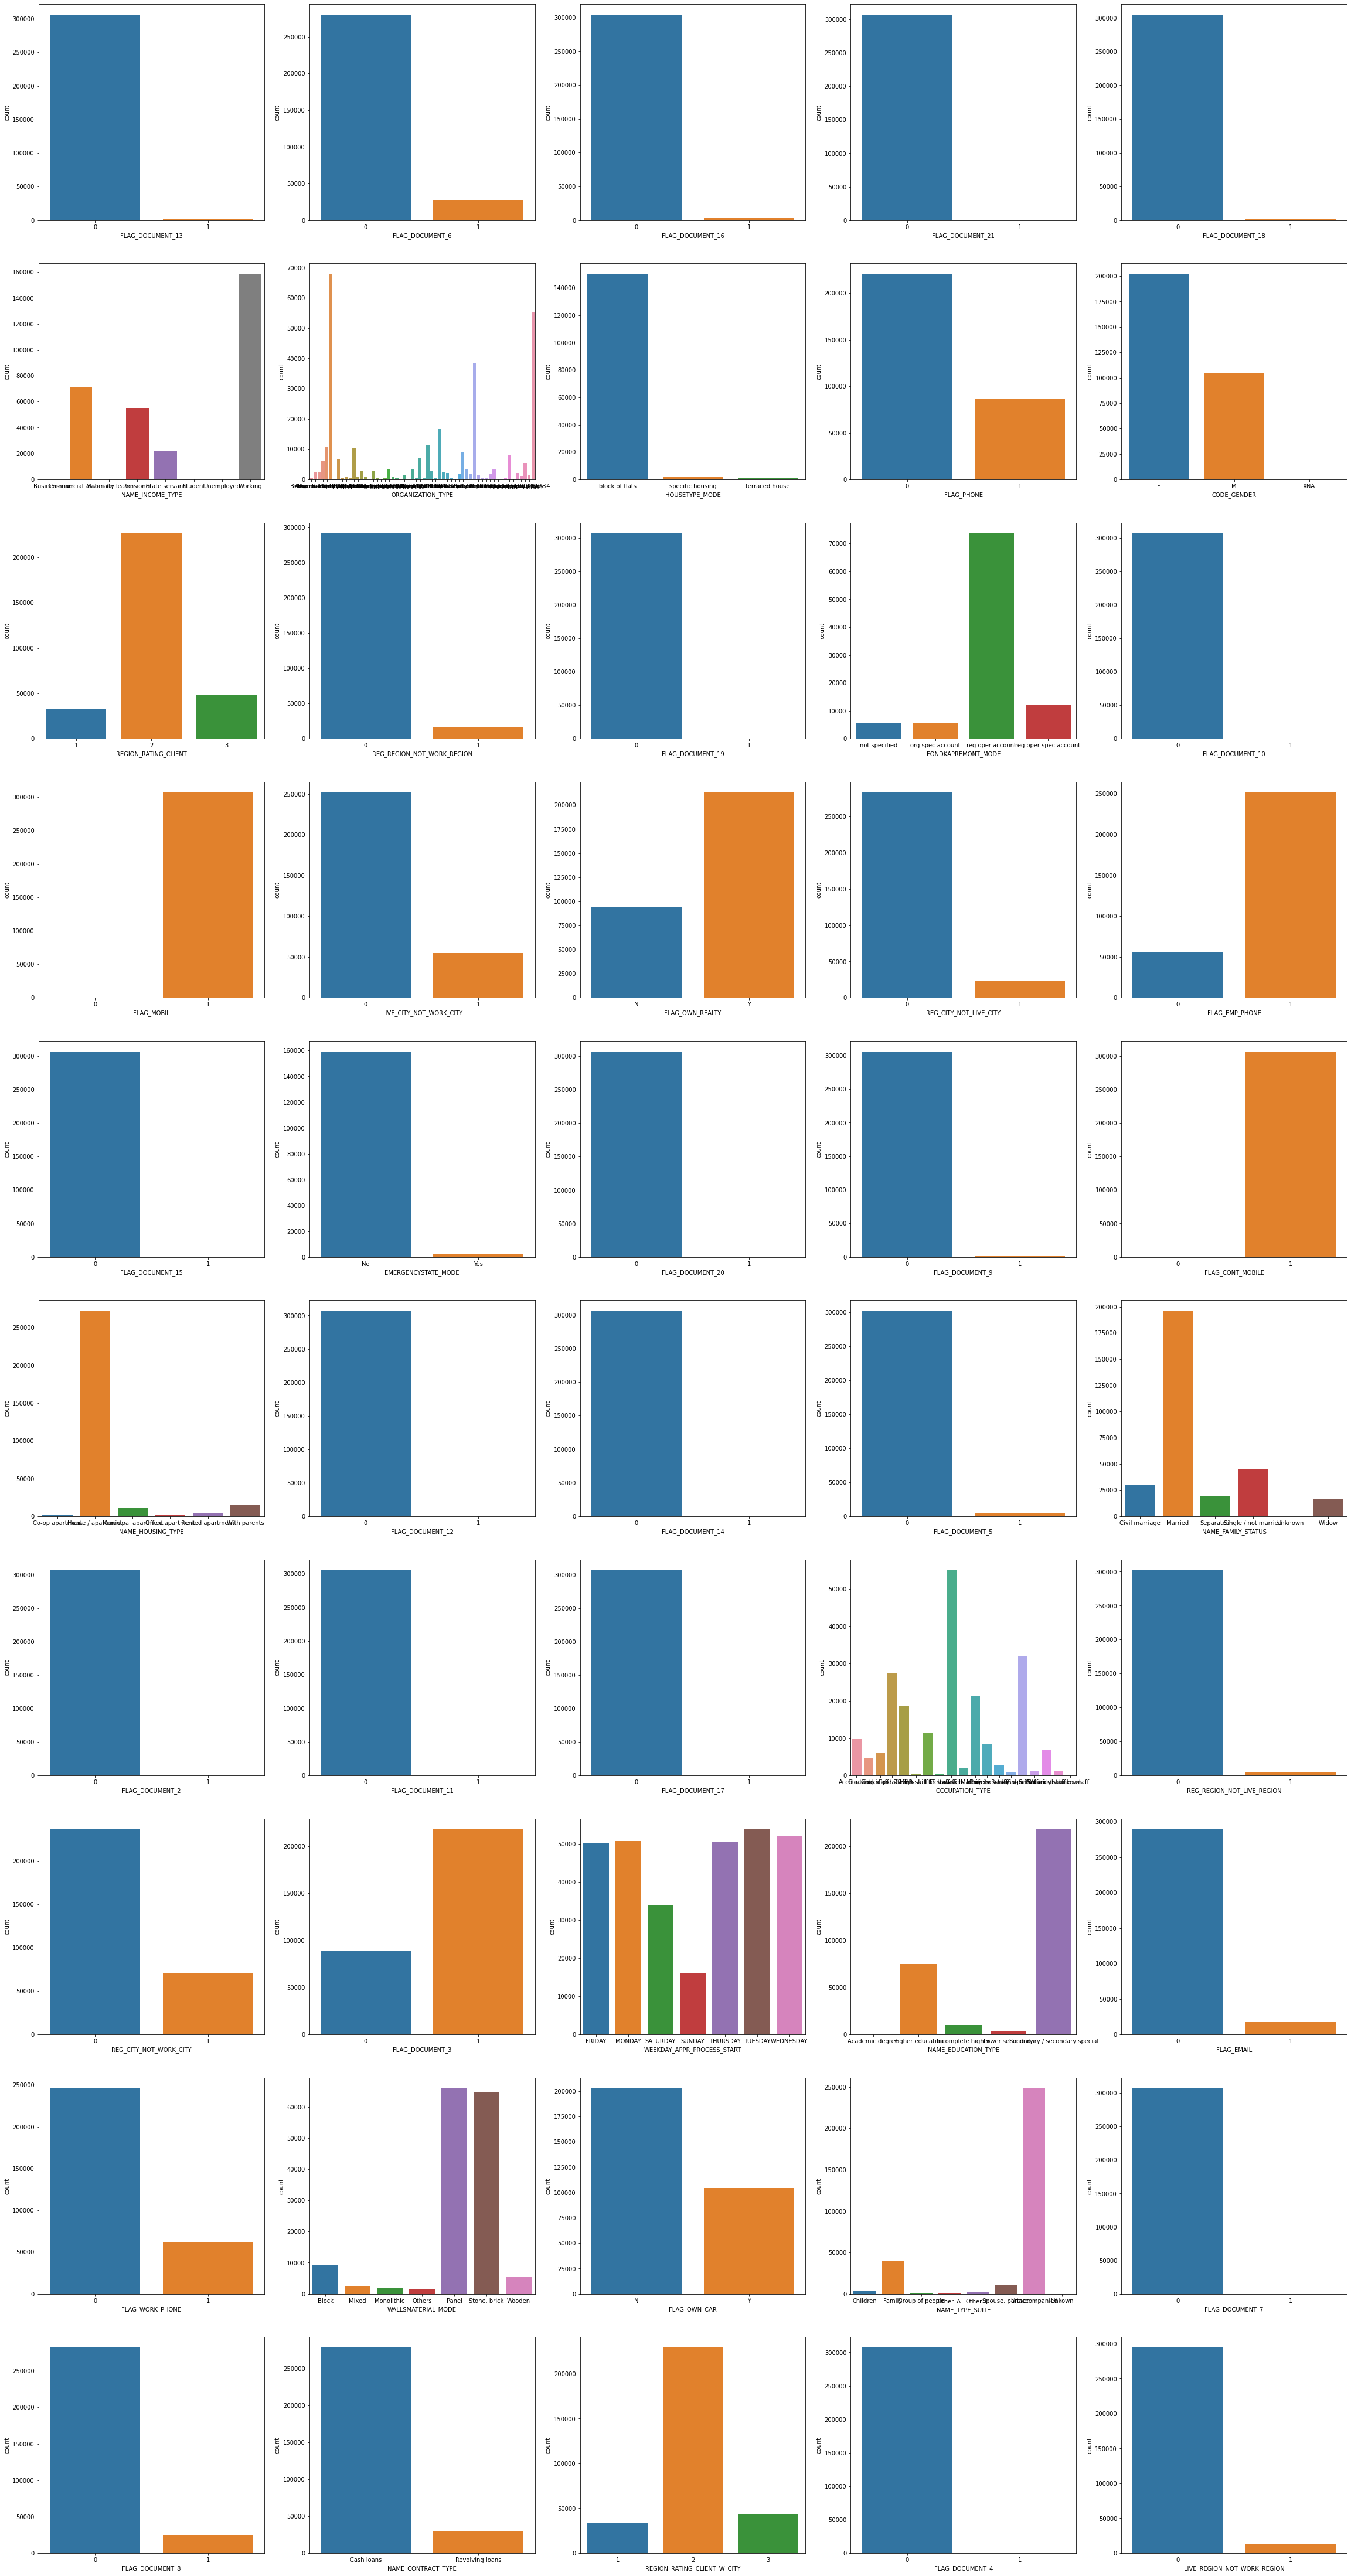

In [ ]:
#Histogram plots of categorical data
figure, axis = plt.subplots(ncols=5,nrows=10,squeeze=False,figsize=(40,80))
fig.set_size_inches(150,20)
li1 = list(categorical)
print(len(li1))
for i in range(10):
  for j in range(5):
    ax = sns.countplot(x=li1[i*5+j],data = train_data,ax=axis[i,j])
plt.show()

In [ ]:
#delete categorical coumns based on histogram plots and percent missing value
categorial_del = { "FLAG_MOBIL", "FLAG_DOCUMENT_19", "FLAG_DOCUMENT_7", 
                               "FLAG_DOCUMENT_2", "FLAG_DOCUMENT_9","FLAG_DOCUMENT_12", 
                               "FLAG_CONT_MOBILE", "FLAG_DOCUMENT_13", "FLAG_DOCUMENT_17", 
                               "FLAG_DOCUMENT_5", "FLAG_DOCUMENT_16", "FLAG_DOCUMENT_20",
                              "FLAG_DOCUMENT_21", "FLAG_DOCUMENT_10", "FLAG_DOCUMENT_15", 
                              "FLAG_DOCUMENT_14", "FLAG_DOCUMENT_11", "FLAG_DOCUMENT_4",
                              "FLAG_DOCUMENT_6", "REG_REGION_NOT_LIVE_REGION", "FLAG_DOCUMENT_18",
                              "OCCUPATION_TYPE", "ORGANIZATION_TYPE", "FLAG_DOCUMENT_3",
                              "WEEKDAY_APPR_PROCESS_START", "CODE_GENDER",
                              'NAME_TYPE_SUITE', 
                              'NAME_HOUSING_TYPE', 'NAME_FAMILY_STATUS', 'REG_REGION_NOT_WORK_REGION', 
                               'REGION_RATING_CLIENT_W_CITY', 'CODE_GENDER', 'NAME_FAMILY_STATUS', 
                               'WEEKDAY_APPR_PROCESS_START', 'NAME_INCOME_TYPE' } 
for a1 in categorical:
  if '_MODE' in a1:
    categorial_del.add(a1)
    

for d in categorial_del:
    train_data.drop(d, inplace=True, axis=1)


categorical = categorical - categorial_del
print(len(categorical))   #14

14


# Encoding 

In [ ]:
#Categorical Encoding
mp = {
    "Lower secondary": 0,
    "Secondary / secondary special":1,
    "Incomplete higher" : 2,
    "Higher education" : 3,
    "Academic degree" : 4
}

for edu_type, edu_value in mp.items():
  train_data['NAME_EDUCATION_TYPE'].replace(to_replace=edu_type,value = edu_value,inplace=True)

#One Hot Encoding
one_hot_encoding = { "NAME_CONTRACT_TYPE", "FLAG_EMP_PHONE", 'REG_CITY_NOT_LIVE_CITY', 'FLAG_OWN_CAR', 
                          'FLAG_WORK_PHONE', 'FLAG_EMAIL', 'LIVE_REGION_NOT_WORK_REGION', 
                          'LIVE_CITY_NOT_WORK_CITY', 'FLAG_OWN_REALTY', 'FLAG_PHONE', 
                          'FLAG_DOCUMENT_8', 'REG_CITY_NOT_WORK_CITY', 'REGION_RATING_CLIENT'
                         }

train_data = pd.get_dummies(train_data, columns=one_hot_encoding, prefix = one_hot_encoding,drop_first=True)
#uncomment below code for first column
#train_data = pd.get_dummies(train_data, columns=one_hot_encoding, prefix = one_hot_encoding)

In [ ]:
print(train_data.shape)

(307511, 27)


# Preprocessing

In [ ]:
#Standard Scaling
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler,RobustScaler
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

train_data.fillna((train_data.median()), inplace=True)
x = train_data.drop(columns=['TARGET'])
y = train_data['TARGET']
fnames = x.columns.tolist()
#uncomment below to include robust scaling
"""
scaler = RobustScaler()
robust_df = scaler.fit_transform(x)
train_data[fnames] = pd.DataFrame(robust_df, columns =fnames)
"""
sc = StandardScaler()
train_data[fnames] = sc.fit_transform(train_data[fnames])

In [ ]:
#Down scaling
from imblearn.under_sampling import NearMiss 
nm = NearMiss(version=3)
x_res,y_res = nm.fit_resample(train_data[fnames],train_data['TARGET'])
x_res = pd.DataFrame(data=x_res,columns=fnames)
y_res = pd.DataFrame(data=y_res,columns=['TARGET'])

print(x_res.shape)
print(y_res.shape)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/loca

(49650, 26)
(49650, 1)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
x_res.sample(10)

,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_EDUCATION_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,EXT_SOURCE_2,EXT_SOURCE_3,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_EMAIL_1,FLAG_WORK_PHONE_1,FLAG_OWN_CAR_Y,FLAG_DOCUMENT_8_1,NAME_CONTRACT_TYPE_Revolving loans,LIVE_CITY_NOT_WORK_CITY_1,FLAG_PHONE_1,FLAG_OWN_REALTY_Y,REG_CITY_NOT_LIVE_CITY_1,REGION_RATING_CLIENT_2,REGION_RATING_CLIENT_3,FLAG_EMP_PHONE_1,LIVE_REGION_NOT_WORK_REGION_1,REG_CITY_NOT_WORK_CITY_1
24382,-0.142533,0.936035,1.704312,-1.150157,0.855640,0.999784,-0.617973,-0.005770,0.448221,-0.453190,-0.275663,1.164552,-0.245215,-0.499013,1.392925,-0.297632,-0.324395,2.137601,-0.625259,0.664531,-0.291208,0.595625,-0.431824,0.468697,-0.205869,1.827367
21395,0.142129,-0.928855,-0.582598,-0.818372,0.006644,1.392928,-0.629235,-0.146313,0.427180,0.112063,-0.275663,0.494503,-0.245215,-0.499013,-0.717914,-0.297632,-0.324395,2.137601,-0.625259,0.664531,3.433973,0.595625,-0.431824,0.468697,-0.205869,1.827367
42113,0.331904,1.032981,-0.582598,1.078997,-0.364347,0.144518,1.221773,-1.270664,-1.822226,0.112063,-0.275663,-0.575881,-0.245215,-0.499013,1.392925,-0.297632,-0.324395,-0.467814,-0.625259,0.664531,-0.291208,0.595625,-0.431824,0.468697,-0.205869,-0.547236
28289,-0.370264,-0.746637,-0.582598,-1.440947,-1.108393,0.384663,-0.673622,-0.146313,-0.423407,-1.369237,2.488799,0.017971,-0.245215,2.003956,-0.717914,-0.297632,-0.324395,-0.467814,-0.625259,-1.504820,-0.291208,-1.678908,2.315758,0.468697,-0.205869,-0.547236
22118,0.157311,-0.781699,-0.582598,0.139676,0.956007,-0.291489,-0.755109,2.383476,-1.123314,0.112063,-0.275663,-0.304959,-0.245215,-0.499013,1.392925,-0.297632,-0.324395,2.137601,-0.625259,0.664531,-0.291208,0.595625,-0.431824,0.468697,-0.205869,1.827367
23399,-0.047646,0.734777,-0.582598,-0.011215,-0.738547,0.429228,0.127995,0.837493,-0.618157,0.112063,-0.275663,0.998854,-0.245215,-0.499013,1.392925,-0.297632,-0.324395,2.137601,-0.625259,0.664531,-0.291208,-1.678908,2.315758,0.468697,-0.205869,1.827367
44684,-0.237421,-0.855489,-0.582598,-0.783451,-0.388637,-0.612533,1.192623,2.242932,0.614130,-1.259689,-0.275663,-0.265046,-0.245215,-0.499013,1.392925,-0.297632,-0.324395,-0.467814,1.599337,0.664531,-0.291208,0.595625,-0.431824,0.468697,-0.205869,-0.547236
22666,-0.237421,1.234798,-0.582598,-0.205268,0.860452,1.245606,0.636791,-0.146313,-0.822185,0.574736,-0.275663,-1.732138,-0.245215,-0.499013,-0.717914,-0.297632,-0.324395,-0.467814,-0.625259,-1.504820,-0.291208,-1.678908,2.315758,0.468697,-0.205869,-0.547236
21918,0.047242,0.631146,1.704312,-0.818372,1.137263,-1.718730,1.613307,-0.146313,1.403180,0.112063,-0.275663,-0.392041,4.078050,-0.499013,-0.717914,-0.297632,-0.324395,-0.467814,-0.625259,0.664531,-0.291208,0.595625,-0.431824,0.468697,-0.205869,-0.547236
41067,0.616567,0.038384,-0.582598,-1.233085,-0.238086,0.213780,1.570907,-0.427401,-0.195559,0.914058,2.488799,-0.419859,-0.245215,-0.499013,1.392925,-0.297632,-0.324395,-0.467814,-0.625259,0.664531,-0.291208,0.595625,-0.431824,0.468697,-0.205869,-0.547236


In [19]:
import pickle 
with open('x_res.pkl', 'wb') as output:
  pickle.dump(x_res,output,pickle.HIGHEST_PROTOCOL)

import pickle 
with open('y_res.pkl', 'wb') as output:
  pickle.dump(y_res,output,pickle.HIGHEST_PROTOCOL)